In [1]:
pip install tensorflow

In [2]:
# dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

In [3]:
# xception model
model = Xception(
    include_top=True,
    weights='imagenet')

In [4]:
# default image size
image_size = (299,299)

..\project3\dataset\single_prediction\cat_or_dog_1.jpg


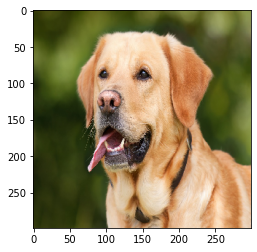

In [5]:
# load image and resize 
image_path = os.path.join("..", "project3", "dataset", "single_prediction", "cat_or_dog_1.jpg")
print(image_path)
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [6]:
# preprocess image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n02099712', 'Labrador_retriever', 0.65168667), ('n02099601', 'golden_retriever', 0.106690295), ('n02087394', 'Rhodesian_ridgeback', 0.034241695)]


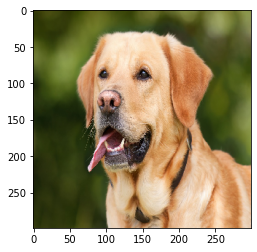

In [7]:
# predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [8]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    return  decode_predictions(predictions, top=3)[0]

In [9]:
image_path = os.path.join("..", "project3", "dataset", "single_prediction", "cat_or_dog_2.jpg")

cur_preds = predict(image_path)
cur_preds

[('n02124075', 'Egyptian_cat', 0.43581074),
 ('n02123045', 'tabby', 0.36341122),
 ('n02123159', 'tiger_cat', 0.09214023)]

In [10]:
# pred = decode_predictions(predictions, top=3)[0]
directory = "/Users/monicabustillos/Documents/project3/dataset/test_set/cats_dogs"
prediction_list = []
for file in os.listdir(directory)[:3]:
    if file.endswith(".jpg"):
        image_path = os.path.join("..", "project3", "dataset", "test_set", "cats_dogs", file)
        variable = predict(image_path)
#         print(variable)
        for item in variable:
            prediction_list.append({
                'Image': file,
                'Prediction': item[1],
                'Probability': item[2],
            })
       

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/monicabustillos/Documents/project3/dataset/test_set/cats_dogs'

In [ ]:
prediction_list 